In [ ]:
#Mini-Project by Zahin Sufiyan(zsufiyan@ualberta.ca)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
!pip install mglearn
from IPython.display import HTML, display
from matplotlib import  pyplot as plt
import seaborn as sb
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

     |████████████████████████████████| 540 kB 5.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=50d7c9af1d6b7138bbbd6fe6a5fc7c8aec3c3107a4fa028999a5c2ffa609f907
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# loading Iris Dataset from Local Drive
import io
iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [ ]:
# checking type of Dataset
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# checking column keys of Iris Dataset
print('Keys of iris_dataset" \n', iris.keys())

Keys of iris_dataset" 
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
# Dropping the ID column from the set
iris = iris.drop(columns='Id')

In [ ]:
# Checking the present state of the Dataset 
print(iris.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
feature_names = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'class']
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris.columns = feature_names

In [ ]:
# Checking the total number of samples in each class on the Dataset
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

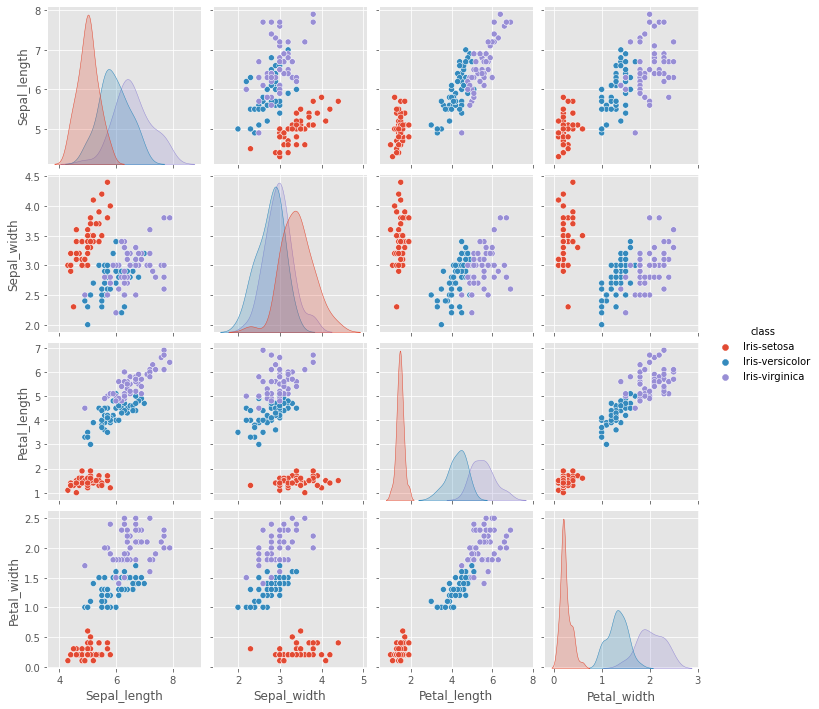

In [ ]:
# Visualizing the data to get a better understanding
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 9,6


sb.pairplot(iris, hue='class')
sb.set(style='ticks')
plt.show()


In [ ]:
X = iris.values[:, :4]
Y = iris.values[:, 4]

In [ ]:
# Spliting the dataset for Cross Validation

size_test = 0.15
seed = 7
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=size_test, random_state=seed)

In [ ]:
print(X_train.shape)
print(Y_test.shape)

(127, 4)
(23,)


In [ ]:
size_val = 0.15
seed = 7
np.random.seed(seed)
X_sub_train, X_dev, Y_sub_train, Y_dev = model_selection.train_test_split(X_train, Y_train, test_size=size_val, random_state=seed)

In [ ]:
print(X_sub_train.shape)
print(X_dev.shape)

(107, 4)
(20, 4)


Text(0, 0.5, 'No of flowers')

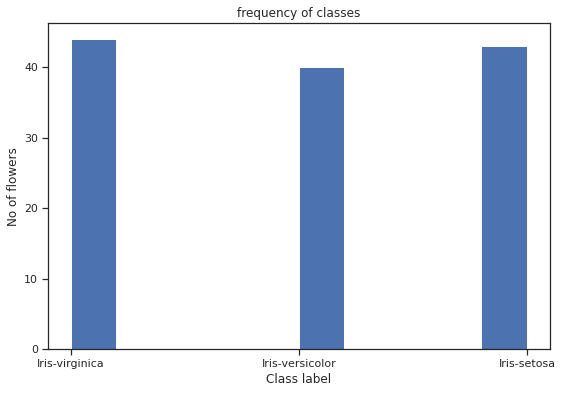

In [ ]:
#create figure and axis

fig, ax = plt.subplots()
ax.hist(Y_train)
ax.set_title('frequency of classes')
ax.set_xlabel('Class label')
ax.set_ylabel('No of flowers')

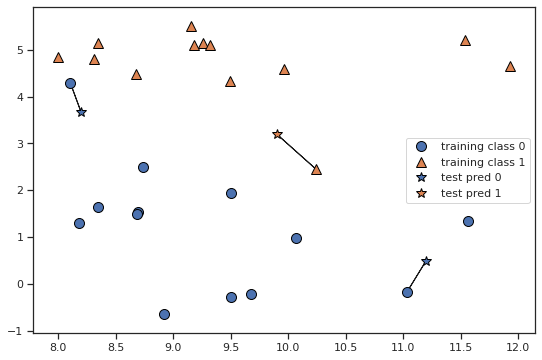

In [ ]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors = 1)

warnings.filterwarnings('ignore')

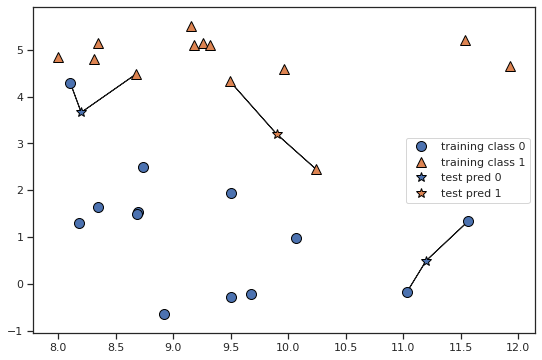

In [ ]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors = 2)

warnings.filterwarnings('ignore')

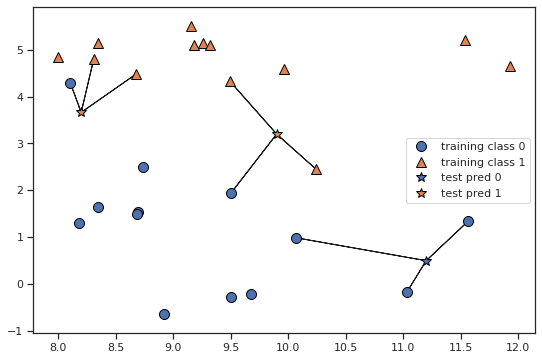

In [ ]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors = 3)

warnings.filterwarnings('ignore')

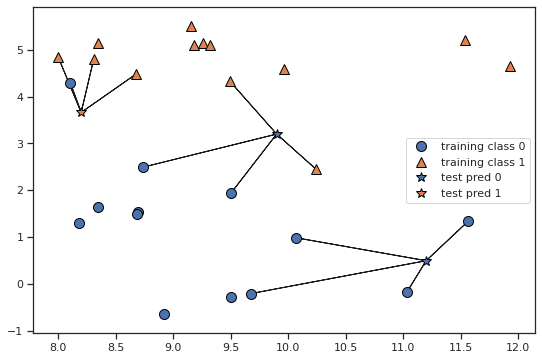

In [ ]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors = 4)

warnings.filterwarnings('ignore')

In [ ]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = [ 2, 4, 6, 8, 11, 16, 22, 32, 50]

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sub_train,Y_sub_train)
    Y_pred = knn.predict(X_dev)
    accuracy = accuracy_score(Y_dev, Y_pred)
    k_scores.append(accuracy)

print(k_scores)

[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1.0]


In [ ]:
# First Experimentation
# Implenting KNN model
KNN = KNeighborsClassifier(n_neighbors=10, weights= 'distance', p = 2)

In [ ]:
# Cross-Validation parameters
split_num = 5
score= 'accuracy'
k_Fold = model_selection.KFold(n_splits=split_num)

cross_val_result = model_selection.cross_val_score(KNN, X_train, Y_train, cv=k_Fold, scoring=score)
results = "%s: %.4f" % ('Accuracy using KNN Model: ', cross_val_result.mean())
print(results)
#print(cross_val_result)

Accuracy using KNN Model: : 0.9840


In [ ]:
# Generating Confusion Matrix (KNN)
KNN.fit(X_train,Y_train)
y_pred = KNN.predict(X_test)

print('Confusion Matrix (KNN):')
c_mat = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(c_mat)

Confusion Matrix (KNN):


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,7,0,0,7
Iris-versicolor,0,8,2,10
Iris-virginica,0,1,5,6
All,7,9,7,23


In [ ]:
# Generating Classification Report (KNN)
classfication_rep = classification_report(Y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
print('Classification report for KNN:\n',classfication_rep)

# Generating Accuracy on train and test datasets (KNN)
acc_train = KNN.score(X_train,Y_train)
acc_test = KNN.score(X_test,Y_test)
print('Train and test datasets Accuracy values:', "%.4f and %.4f" % (acc_train, acc_test))

Classification report for KNN:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.71      0.83      0.77         6

       accuracy                           0.87        23
      macro avg       0.87      0.88      0.87        23
   weighted avg       0.88      0.87      0.87        23

Train and test datasets Accuracy values: 1.0000 and 0.8696


In [ ]:
# Third Experimentation
# Implenting SVM model

from sklearn import svm
SVM = svm.SVC(gamma = 'auto')

In [ ]:
# Cross-Validation parameters
split_num = 5
score= 'accuracy'
k_Fold = model_selection.KFold(n_splits=split_num)

cross_val_result = model_selection.cross_val_score(SVM, X_train, Y_train, cv=k_Fold, scoring=score)
results = "%s: %.4f" % ('Accuracy using SVM Model: ', cross_val_result.mean())
print(results)
#print(cross_val_result)

Accuracy using SVM Model: : 0.9920


In [ ]:
# search for an optimal value of C for SVM

# list of integers 1 to 3
# integers we want to try
c_range =  [1, 4, 8, 16, 45, 100]

c_scores = []

# 1. we will loop through reasonable values of C
for k in k_range:
    svm_2 = svm.SVC(C=k, gamma = 'auto')
    svm_2.fit(X_sub_train,Y_sub_train)
    Y_pred = svm_2.predict(X_dev)
    accuracy = accuracy_score(Y_dev, Y_pred)
    c_scores.append(accuracy)

print(c_scores)

[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


In [ ]:
# Generating Confusion Matrix (SVM)
SVM.fit(X_train,Y_train)
y_pred = SVM.predict(X_test)

print('Confusion Matrix (SVM):')
c_mat = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(c_mat)

Confusion Matrix (SVM):


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,7,0,0,7
Iris-versicolor,0,8,2,10
Iris-virginica,0,0,6,6
All,7,8,8,23


In [ ]:
# Generating Classification Report (SVM)
classfication_rep = classification_report(Y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
print('Classification report for SVM:\n',classfication_rep)

# Generating Accuracy on train and test datasets (SVM)
acc_train = SVM.score(X_train,Y_train)
acc_test = SVM.score(X_test,Y_test)
print('Train and test datasets Accuracy values:', "%.4f and %.4f" % (acc_train, acc_test))

Classification report for SVM:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.91        23
      macro avg       0.92      0.93      0.92        23
   weighted avg       0.93      0.91      0.91        23

Train and test datasets Accuracy values: 0.9921 and 0.9130


In [ ]:
# search for an optimal value of C for LR

# list of integers 1 to 6
# integers we want to try
c_range = range(1, 6)

# list of scores from k_range
c_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:

    logistic = LogisticRegression(C = k)
    logistic.fit(X_sub_train,Y_sub_train)
    Y_pred = logistic.predict(X_dev)
    accuracy = accuracy_score(Y_dev, Y_pred)
    c_scores.append(accuracy)

print(c_scores)

[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


In [ ]:
# Second Experimentation
# Implenting Logistic Regression model

logistic = LogisticRegression()

In [ ]:

# Cross-Validation parameters
split_num = 5
score= 'accuracy'
k_Fold = model_selection.KFold(n_splits=split_num)

#Normalizing training data so that I do not get the "ConvergenceWarning: Liblinear failed to converge"
# from sklearn.preprocessing import StandardScaler  
# sc = StandardScaler()  
# X_train = sc.fit_transform(X_train)  

cross_val_result = model_selection.cross_val_score(logistic, X_train, Y_train, cv=k_Fold, scoring=score)
results = "%s: %.4f" % ('Accuracy using Logistic Regression Model: ', cross_val_result.mean())
print(results)
#print(cross_val_result)

Accuracy using Logistic Regression Model: : 0.9843


In [ ]:
# Generating Confusion Matrix (Logistic Regression)
logistic.fit(X_train,Y_train)
y_pred = logistic.predict(X_test)

print('Confusion Matrix (Logistic Regression):')
c_mat = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(c_mat)

Confusion Matrix (Logistic Regression):


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,7,0,0,7
Iris-versicolor,0,8,2,10
Iris-virginica,0,1,5,6
All,7,9,7,23


In [ ]:
# Generating Classification Report (Logistic Regression)
classfication_rep = classification_report(Y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
print('Classification report for Logistic Regression:\n',classfication_rep)

# Generating Accuracy on train and test datasets (Logistic Regression)
acc_train = logistic.score(X_train,Y_train)
acc_test = logistic.score(X_test,Y_test)
print('Train and test datasets Accuracy values:', "%.4f and %.4f" % (acc_train, acc_test))

Classification report for Logistic Regression:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.71      0.83      0.77         6

       accuracy                           0.87        23
      macro avg       0.87      0.88      0.87        23
   weighted avg       0.88      0.87      0.87        23

Train and test datasets Accuracy values: 0.9843 and 0.8696
